# Task 3: Sales Performance Dashboard

## Task Overview

In this task, we aim to create a Sales Performance Dashboard using the Superstore Dataset. This dashboard will help us analyze sales performance across different regions, track sales trends over time, and gain insights into various factors influencing sales and profit. By visualizing the data, we can make data-driven decisions to improve business strategies and performance.

## Dataset

The dataset used in this task is the Superstore Dataset, which includes sales data for a fictional superstore. The dataset contains various attributes such as order ID, order date, ship date, ship mode, customer ID, customer name, segment, country, city, state, postal code, region, product ID, category, sub-category, product name, sales, quantity, discount, and profit.

### Key Columns:

- **Order Date**: The date when the order was placed.
- **Ship Date**: The date when the order was shipped.
- **Ship Mode**: The shipping mode used for the order.
- **Customer ID**: Unique identifier for each customer.
- **Customer Name**: Name of the customer.
- **Segment**: The segment to which the customer belongs (e.g., Consumer, Corporate, Home Office).
- **Region**: The geographical region of the order.
- **Category**: The category of the product ordered (e.g., Furniture, Office Supplies, Technology).
- **Sub-Category**: The sub-category of the product ordered.
- **Sales**: The sales amount.
- **Quantity**: The quantity of products ordered.
- **Discount**: The discount applied to the order.
- **Profit**: The profit earned from the order.

## Need for This Analysis

The primary goal of this analysis is to understand the sales performance across different regions and over time. By doing this, we can identify trends, patterns, and insights that can help in:

- Optimizing inventory management.
- Improving marketing strategies.
- Identifying profitable regions and segments.
- Enhancing customer satisfaction by understanding their preferences.

## Visualization Libraries

To perform this analysis and create visualizations, we will use the following Python libraries:

- **Pandas**: For data manipulation and analysis.
- **Matplotlib**: A plotting library for creating static, interactive, and animated visualizations in Python.
- **Seaborn**: A data visualization library based on Matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.

With these tools, we will create various plots and charts to visualize the sales data and uncover actionable insights.


In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
file_path = "C:\\Users\\HP\\Downloads\\archive (9)\\Sample - Superstore.csv"
df = pd.read_csv(file_path, encoding='latin1')

In [3]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# Summary statistics
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
# Check for missing values
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [6]:
# Check data types
print(df.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [7]:
# Group data by region and sum sales
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

C:\Users\HP\AppData\Local\Temp\ipykernel_31384\2699419208.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales',data=df , palette='inferno')


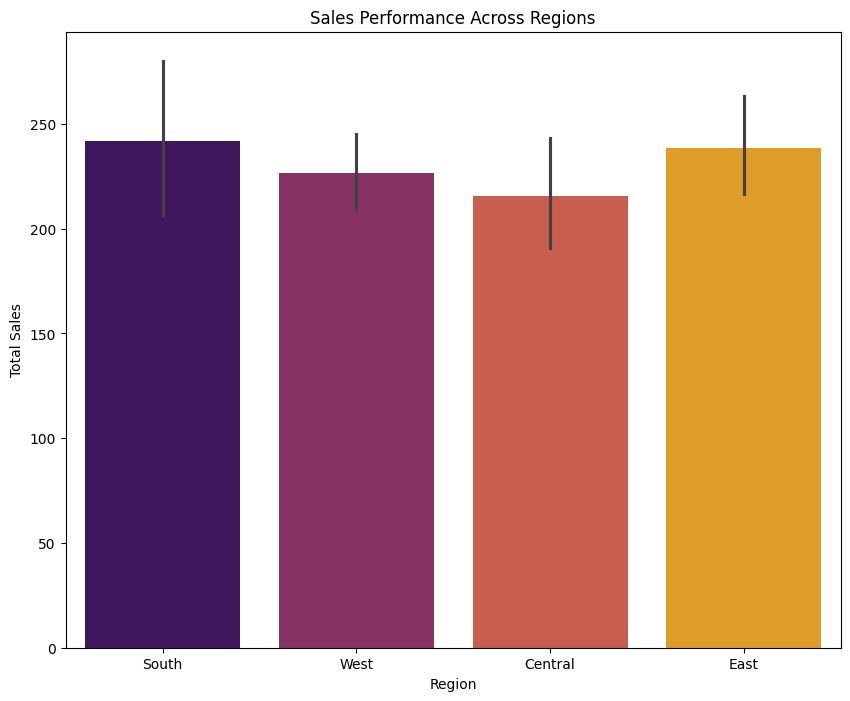

In [18]:
#plot sales by region
plt.figure(figsize=(10,8))
sns.barplot(x='Region', y='Sales',data=df , palette='inferno')
plt.title('Sales Performance Across Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [9]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create 'YearMonth' column
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

# Group data by 'YearMonth' and sum 'Sales'
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

# Ensure 'Sales' is numeric
monthly_sales['Sales'] = pd.to_numeric(monthly_sales['Sales'], errors='coerce')

# Drop any rows where 'Sales' could not be converted to numeric
monthly_sales.dropna(subset=['Sales'], inplace=True)

# Convert 'Sales' to float
monthly_sales['Sales'] = monthly_sales['Sales'].astype(float)


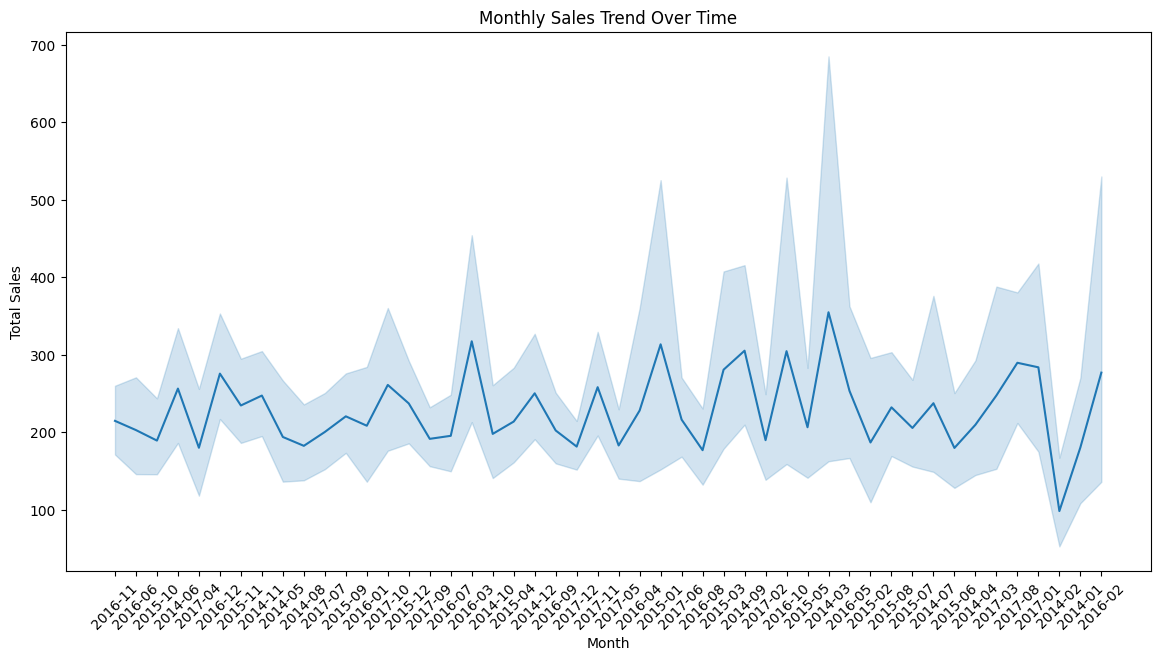

In [10]:
# Plot sales trend over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='YearMonth', y='Sales', data=df)
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

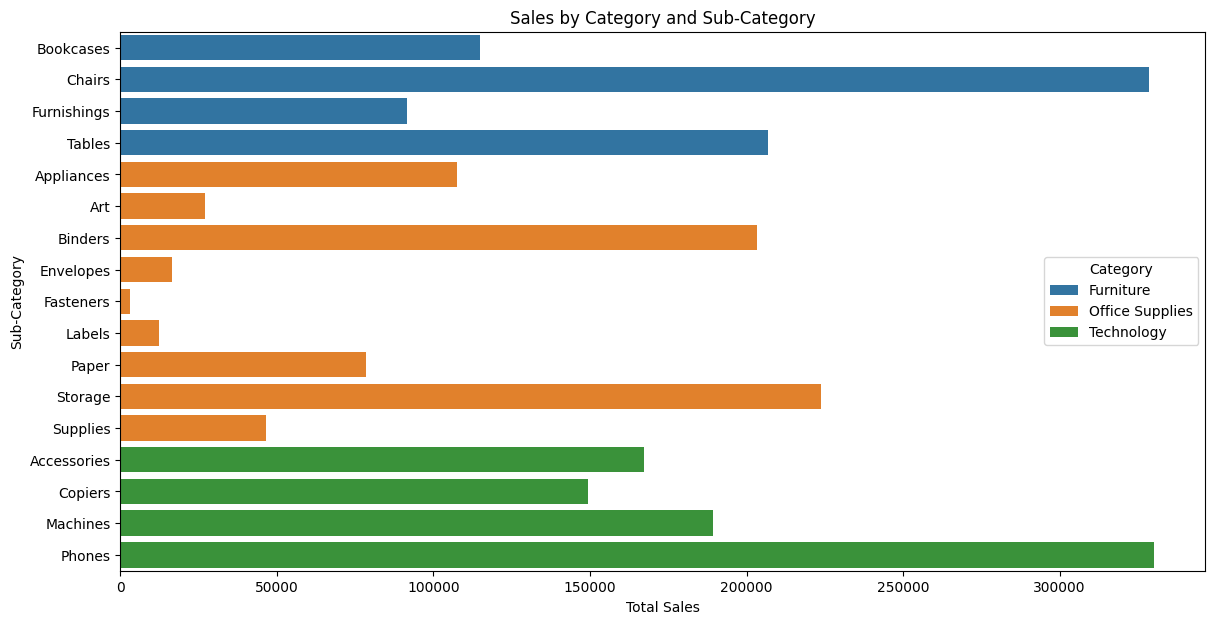

In [11]:
# Group data by Category and Sub-Category and sum sales
category_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Plot sales by Category and Sub-Category
plt.figure(figsize=(14, 7))
sns.barplot(x='Sales', y='Sub-Category', hue='Category', data=category_sales)
plt.title('Sales by Category and Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.legend(title='Category')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_31384\2727391440.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=region_profit, palette = "Accent")


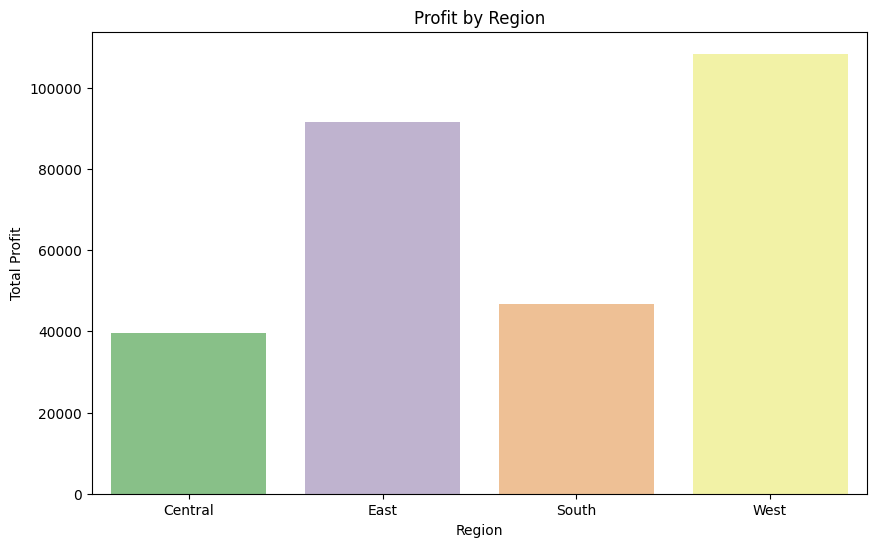

In [12]:
# Group data by region and sum profit
region_profit = df.groupby('Region')['Profit'].sum().reset_index()

# Plot profit by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=region_profit, palette = "Accent")
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_31384\1736956244.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Sales', data=segment_sales_profit , palette = 'inferno')


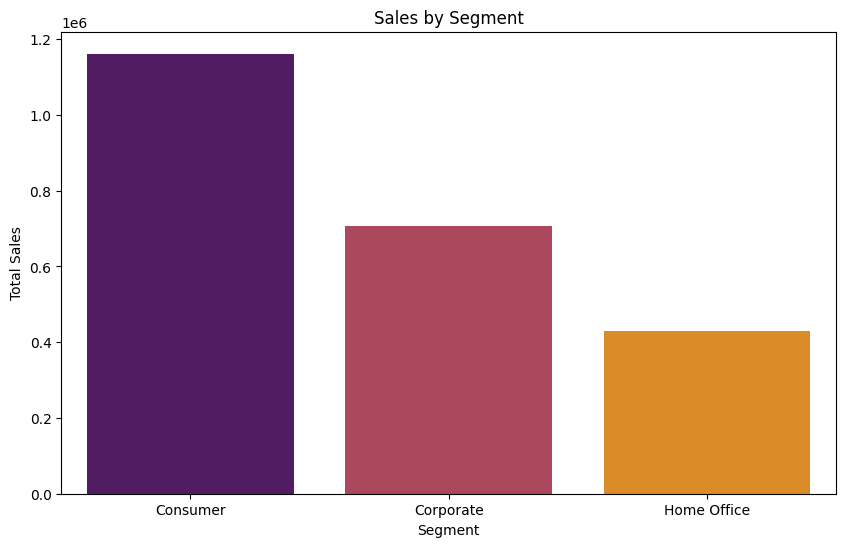

In [13]:
# Group data by segment and sum sales and profit
segment_sales_profit = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Plot sales by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=segment_sales_profit , palette = 'inferno')
plt.title('Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()




C:\Users\HP\AppData\Local\Temp\ipykernel_31384\2844170277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Profit', data=segment_sales_profit, palette = 'Accent')


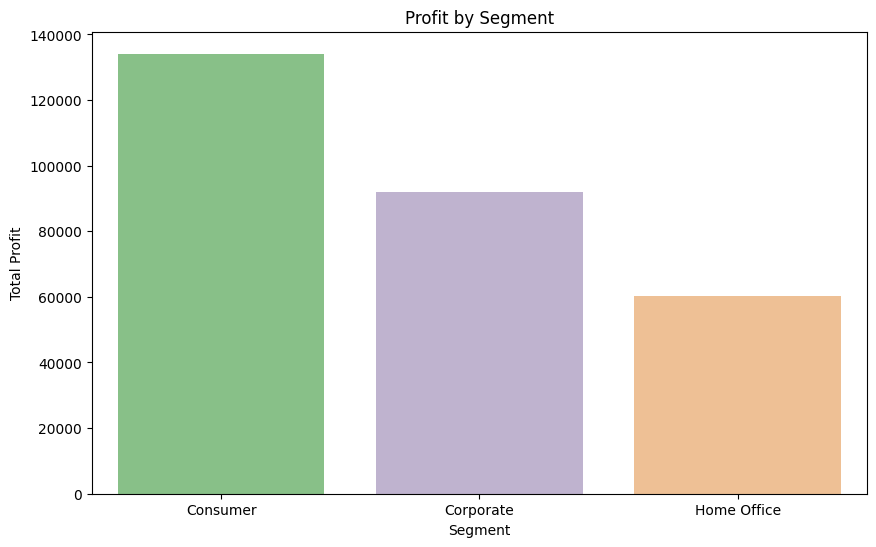

In [14]:
# Plot profit by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Profit', data=segment_sales_profit, palette = 'Accent')
plt.title('Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.show()

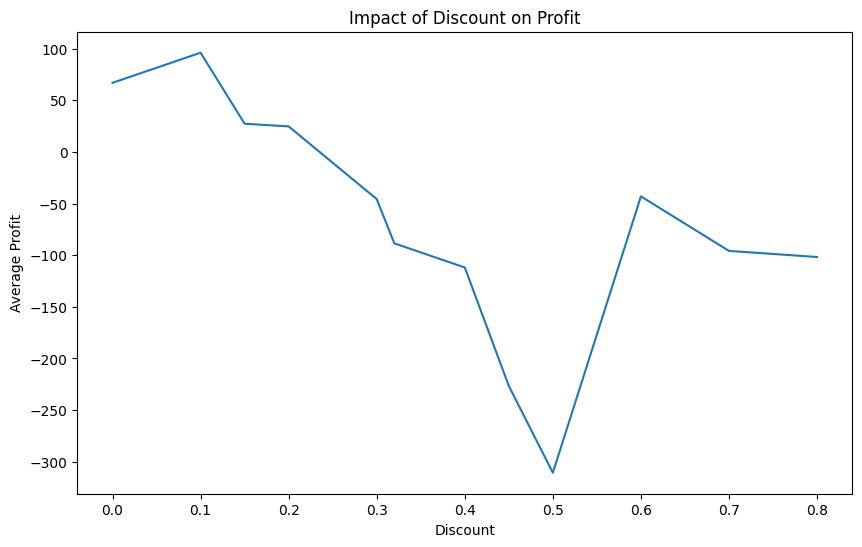

In [15]:
# Group data by discount and calculate average profit
discount_profit = df.groupby('Discount')['Profit'].mean().reset_index()

# Plot profit by discount
plt.figure(figsize=(10, 6))
sns.lineplot(x='Discount', y='Profit', data=discount_profit)
plt.title('Impact of Discount on Profit')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.show()


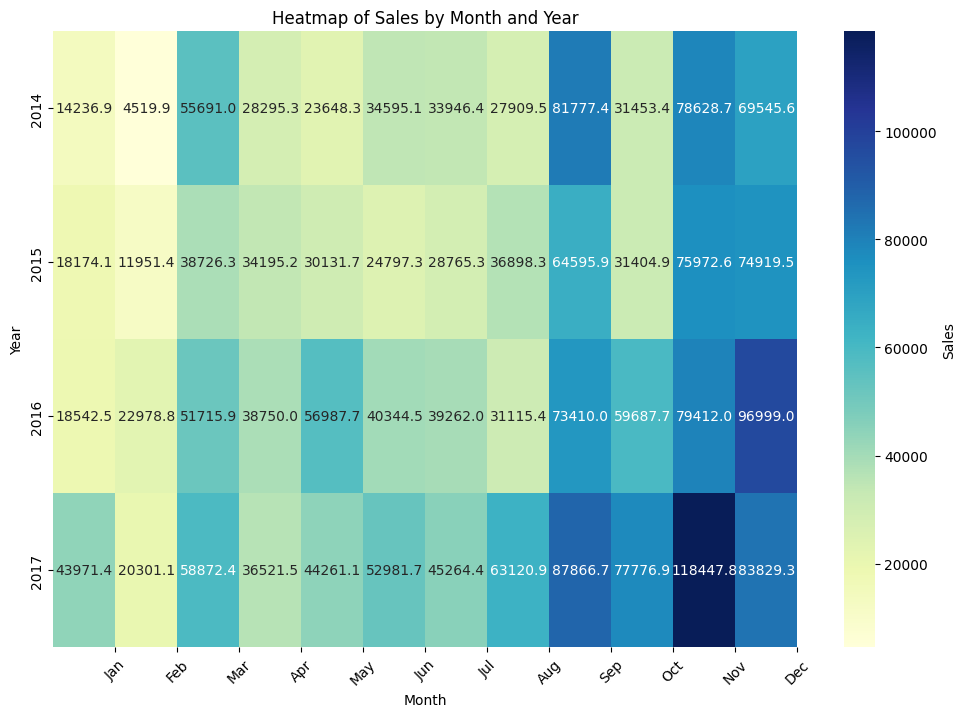

In [16]:
import calendar

# Extract year and month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group data by year and month and sum sales
year_month_sales = df.groupby(['Year', 'Month'])['Sales'].sum().unstack()

# Plot heatmap of sales by month and year
plt.figure(figsize=(12, 8))
sns.heatmap(year_month_sales, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Sales'})
plt.title('Heatmap of Sales by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(1, 13), labels=[calendar.month_abbr[i] for i in range(1, 13)], rotation=45)
plt.show()


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


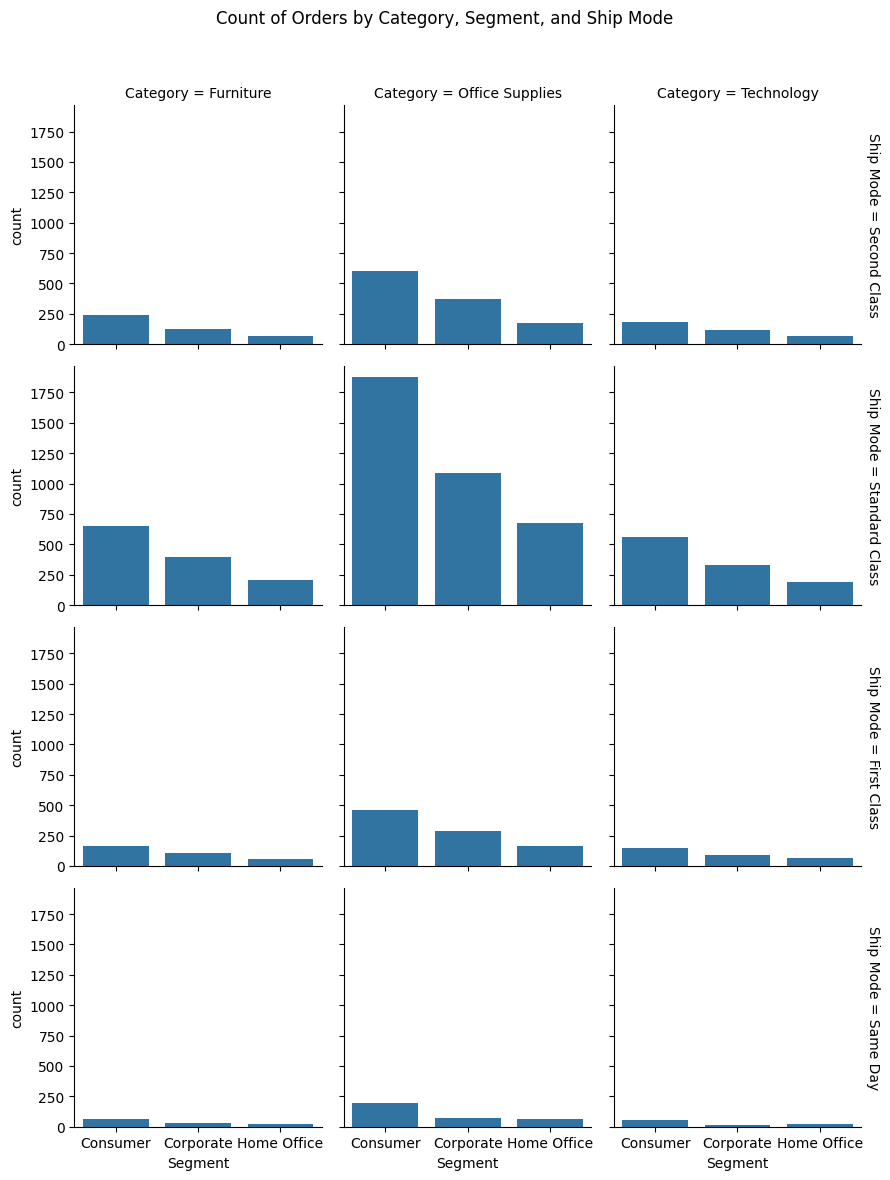

In [17]:
# Create a FacetGrid for Category and Ship Mode
g = sns.FacetGrid(df, col="Category", row="Ship Mode", margin_titles=True)
g.map(sns.countplot, "Segment", order=df['Segment'].value_counts().index)

# Add titles
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Orders by Category, Segment, and Ship Mode')

# Show the plot
plt.show()
